In [124]:
import requests
import json
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [125]:
raw_data = pd.read_csv('Profeco_Catalog.csv')
raw_data.head(1)

,Unnamed: 0,_id,cadenaComercial,catalogo,categoria,direccion,estado,fechaRegistro,giro,latitud,longitud,marca,municipio,nombreComercial,precio,presentacion,producto,razonSocial,rfc
0,0,571e4c002f232201006c6cac,HIPERMERCADO SORIANA,BASICOS,TORTILLAS Y DERIVADOS DEL MAIZ,"BLVD. ADOLFO LOPEZ MATEOS 1100, ESQ. CALAFIA, ...",BAJA CALIFORNIA,2015-02-10,TIENDA DE AUTOSERVICIO,32.641719,-115.469582,S/M,MEXICALI,SORIANA HIPER SUCURSAL CALAFIA,11.9,1 KG. GRANEL,TORTILLA DE MAIZ,NaN,NaN


In [102]:
master_frame = raw_data.drop(columns = ['giro','razonSocial','rfc','catalogo','Unnamed: 0','direccion','nombreComercial']).reset_index(drop=True).rename(index=str, columns={"_id": "ID", "cadenaComercial": "Cadena", "categoria": "Categoría", "estado": "Estado", "fechaRegistro": "Fecha", "latitud": "Latitud", "longitud": "Longitud", "marca": "Marca", "municipio": "Municipio", "precio": "Precio", "presentacion": "Presentación", "producto": "Producto"})
master_frame.head(1)

,ID,Cadena,Categoría,Estado,Fecha,Latitud,Longitud,Marca,Municipio,Precio,Presentación,Producto
0,571e4c002f232201006c6cac,HIPERMERCADO SORIANA,TORTILLAS Y DERIVADOS DEL MAIZ,BAJA CALIFORNIA,2015-02-10,32.641719,-115.469582,S/M,MEXICALI,11.9,1 KG. GRANEL,TORTILLA DE MAIZ


In [126]:
df_year_registry = master_frame.groupby('Fecha')['Fecha'].count()
df_year_registry

Fecha
2012-01-10      9063
2013-01-10     40539
2015-02-10    131192
2016-05-10     38788
Name: Fecha, dtype: int64

Text(0.5,1,'Registro de Productos/ Año: Profeco')

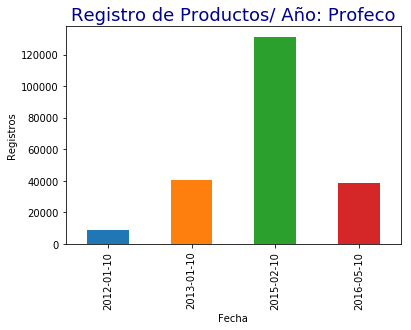

In [201]:
Year_RegChart = df_year_registry.plot.bar()
Year_RegChart.set_ylabel('Registros')
Year_RegChart.set_title('Registro de Productos/ Año: Profeco',fontsize = 18, color= 'DarkBlue')

In [105]:
master_2015frame = master_frame[(master_frame['Fecha'] == '2015-02-10')]
#master_2015frame
df_category = master_2015frame.groupby('Categoría')['Categoría'].count().nlargest(10)
df_category

Categoría
MEDICAMENTOS                         20720
ARTS. PARA EL CUIDADO PERSONAL       10446
APARATOS ELECTRICOS                   8286
DETERGENTES Y PRODUCTOS SIMILARES     7660
DERIVADOS DE LECHE                    7312
CARNES FRIAS SECAS Y EMBUTIDOS        6812
REFRESCOS ENVASADOS                   6216
CONDIMENTOS                           5964
FRUTAS Y LEGUMBRES PROCESADAS         5868
APARATOS ELECTRONICOS                 5684
Name: Categoría, dtype: int64

Text(0.5,1,'Registros por Categoria')

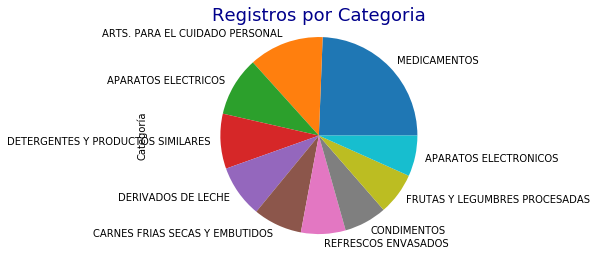

In [259]:
Category_Plot_pie = df_category.plot.pie()
Category_Plot_pie.axis('equal')
Category_Plot_pie.set_title('Registros por Categoria',fontsize = 18, color= 'DarkBlue')

Text(0.5,1,'Registros por Categoria')

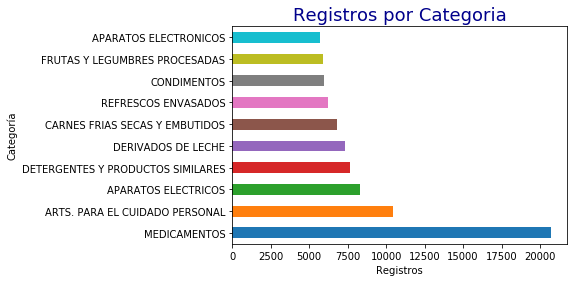

In [199]:
Category_Plot = df_category.plot.barh()
Category_Plot.set_xlabel('Registros')
Category_Plot.set_title('Registros por Categoria', fontsize = 18, color= 'DarkBlue')

In [107]:
#Estados = Master["Estado"].nunique()
Estados = master_2015frame.drop_duplicates("Estado")
#Estados.head(100)
Estados = Estados["Estado"].tolist()
Estados

['BAJA CALIFORNIA',
 'BAJA CALIFORNIA SUR',
 'ZACATECAS',
 'YUCATÁN',
 'TAMAULIPAS',
 'TLAXCALA',
 'SONORA',
 'TABASCO',
 'SINALOA',
 'QUINTANA ROO',
 'VERACRUZ DE IGNACIO DE LA LLAVE',
 'SAN LUIS POTOSÍ',
 'NAYARIT',
 'NUEVO LEÓN',
 'OAXACA',
 'QUERÉTARO',
 'JALISCO',
 'MÉXICO',
 'PUEBLA',
 'MICHOACÁN DE OCAMPO',
 'MORELOS',
 'DISTRITO FEDERAL',
 'AGUASCALIENTES',
 'GUERRERO',
 'HIDALGO',
 'GUANAJUATO',
 'DURANGO',
 'COLIMA',
 'CHIAPAS',
 'COAHUILA DE ZARAGOZA',
 'CHIHUAHUA',
 'CAMPECHE',
 'M��XICO']

In [108]:
category_state = master_2015frame[master_2015frame['Categoría'] == 'MEDICAMENTOS'].groupby(\
                            ['Estado', 'Categoría'])['Categoría'].count().nlargest(5)
#category_state
category_total = master_2015frame[master_2015frame['Categoría'] == 'MEDICAMENTOS'].count()
category_total = category_total['ID']
category_total

20720

In [48]:
#master_frame.groupby(master_frame['Fecha'].date.dt.year)

## Gráfica 3
### Count de categoría por Estado

Aquí tienes que hacer un chart con el número de categorías por Top 5 de estados - Eje X = Estado Eje Y = Categoría

In [109]:
top5_category = pd.DataFrame([category_state])
top5_category.columns = top5_category.columns.droplevel(-1)
#Data Frame con el Top 5 de estados con mayores registros de medicamentos
top5_category.transpose().reset_index()


,Estado,Categoría
0,DISTRITO FEDERAL,4558
1,MÉXICO,4223
2,GUANAJUATO,1992
3,NUEVO LEÓN,1558
4,JALISCO,1328


Text(0.5,1,'Categorias por Estado')

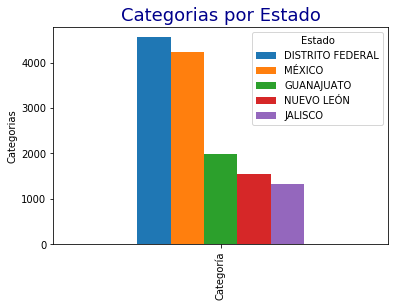

In [239]:
#x='Estado', y='Categoría', rot=0
Top5Chart = top5_category.plot.bar()
Top5Chart.set_ylabel('Categorias')
Top5Chart.set_title('Categorias por Estado', fontsize = 18, color= 'DarkBlue')

## Gráfica 4
### % del total de productos de la categoría medicamentos por Estado

Esta es una métrica que saqué aparte y creo que si es posible podríamos fusionar la primera con la gráfica3 y podemos hacer una gráfica combinada de barras y línea para que salgan ambas métricas. pero l oque sea más fácil

In [194]:
#Data Frame con el Top 5 de estados con el % de contribución del total de registros de medicamentos
top5_categoryperc = top5_category / category_total
other = category_total - top5_category
top5_categoryperc.transpose().style.format("{:.2%}")

,Categoría
Estado,
DISTRITO FEDERAL,22.00%
MÉXICO,20.38%
GUANAJUATO,9.61%
NUEVO LEÓN,7.52%
JALISCO,6.41%


In [191]:
Category_perc = top5_categoryperc.plot.pie(x=x, y=y)
x= ['DISTRITO FEDERAL', 'MÉXICO', 'GUANAJUATO', 'NUEVO LEÓN', 'JALISCO']
y= [top5_categoryperc('Categoría')]
Category_perc.set_title('Porcentaje de Categoria por Estado')


NameError: name 'x' is not defined

## Gráfica 5
### Precio promedio de medicamentos 2015 por top 5 (max precio)

Gráfica que ponga el top 5 de los estados con mayor precio en Mexico

In [53]:
avg_medprice = master_2015frame[master_2015frame['Categoría'] == 'MEDICAMENTOS'].groupby(\
                            ['Categoría'])['Precio'].mean().nlargest(32)
#avg_medprice = avg_medprice['ID']
avg_medprice = avg_medprice['MEDICAMENTOS']
avg_medprice

379.6187374517428

In [83]:
avg_price = master_2015frame[master_2015frame['Categoría'] == 'MEDICAMENTOS'].groupby(\
                            ['Estado', 'Categoría'])['Precio'].mean().nlargest(5)
avg_price


Estado               Categoría   
SINALOA              MEDICAMENTOS    430.158429
M��XICO              MEDICAMENTOS    421.190000
SONORA               MEDICAMENTOS    416.815631
MICHOACÁN DE OCAMPO  MEDICAMENTOS    415.290411
DISTRITO FEDERAL     MEDICAMENTOS    405.847330
Name: Precio, dtype: float64

Text(0.5,1,'Categorias de Medicamentos/ Estado')

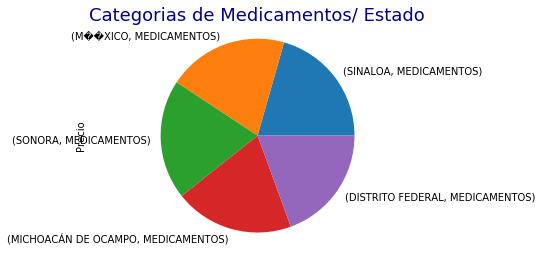

In [260]:
Avg_price_State = avg_price.plot.pie()
Avg_price_State.axis('equal')
Avg_price_State.set_title('Categorias de Medicamentos/ Estado', fontsize = 18, color= 'DarkBlue')

In [55]:
top5_price = pd.DataFrame([avg_price])
top5_price.columns = top5_price.columns.droplevel(-1)
#Data Frame con el Top 5 de estados con mayores registros de medicamentos
top5_price.transpose()

,Precio
Estado,
SINALOA,430.158429
M��XICO,421.190000
SONORA,416.815631
MICHOACÁN DE OCAMPO,415.290411
DISTRITO FEDERAL,405.847330


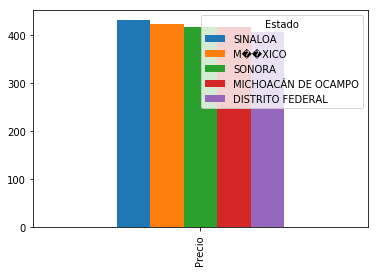

In [271]:
TOP_PRICE = top5_price.plot.bar()


## Gráfica 6
### % prima o descuento de precio promedio en medicamentos por el top 5 de Estados con mayor precio

Esta es una métrica que saqué aparte y creo que si es posible podríamos fusionar la primera con la gráfica5 y podemos hacer una gráfica combinada de barras y línea para que salgan ambas métricas. pero l oque sea más fácil

In [13]:
top5_priceperc = top5_price / avg_medprice - 1
top5_priceperc.transpose().style.format("{:.2%}")

,Precio
Estado,
SINALOA,13.31%
M��XICO,10.95%
SONORA,9.80%
MICHOACÁN DE OCAMPO,9.40%
DISTRITO FEDERAL,6.91%


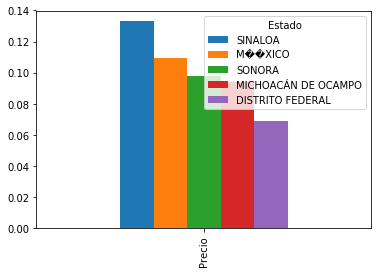

In [86]:
top5_priceperc.plot.bar()

In [14]:
chain_category = master_2015frame[master_2015frame['Categoría'] == 'MEDICAMENTOS'].groupby(\
                            ['Cadena', 'Categoría'])['Categoría'].count().nlargest(5)
chain_category

Cadena                   Categoría   
WAL-MART                 MEDICAMENTOS    3463
SORIANA                  MEDICAMENTOS    3117
BODEGA AURRERA           MEDICAMENTOS    2803
MEGA COMERCIAL MEXICANA  MEDICAMENTOS    1967
SUPERAMA                 MEDICAMENTOS    1673
Name: Categoría, dtype: int64

## Gráfica 7
### Count de categoría por Cadena top5

Aquí tienes que hacer un chart con el número de categorías por Top 5 de cadenaS - Eje X = Cadena Eje Y = Categoría

In [15]:
top5_chain = pd.DataFrame([chain_category])
top5_chain.columns = top5_chain.columns.droplevel(-1)
#Data Frame con el Top 5 de estados con mayores registros de medicamentos
top5_chain.transpose().reset_index()

,Cadena,Categoría
0,WAL-MART,3463
1,SORIANA,3117
2,BODEGA AURRERA,2803
3,MEGA COMERCIAL MEXICANA,1967
4,SUPERAMA,1673


Text(0.5,1,'Categorias de Medicamentos/ Estado')

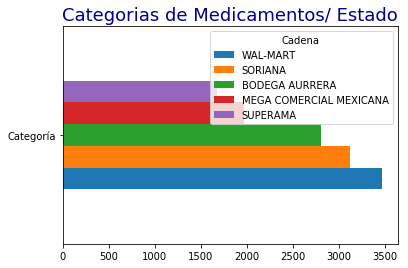

In [213]:
Top5Chaincat = top5_chain.plot.barh()
Top5Chaincat.set_title('Categorias de Medicamentos/ Estado', fontsize = 18, color= 'DarkBlue')

## Gráfica 8
### % del total de productos de la categoría medicamentos por Cadena Comercial

Esta es una métrica que saqué aparte y creo que si es posible podríamos fusionar la primera con la gráfica7 y podemos hacer una gráfica combinada de barras y línea para que salgan ambas métricas. pero l oque sea más fácil

In [16]:
top5_chainperc = top5_chain / category_total
top5_chainperc.transpose().style.format("{:.2%}")

,Categoría
Cadena,
WAL-MART,16.71%
SORIANA,15.04%
BODEGA AURRERA,13.53%
MEGA COMERCIAL MEXICANA,9.49%
SUPERAMA,8.07%


(-0.275, 0.275, 0.0, 0.17548986486486487)

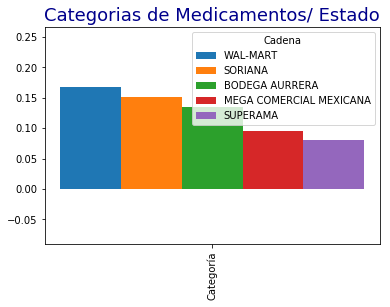

In [250]:
Top5ChainPerc = top5_chainperc.plot.bar()
Top5ChainPerc.set_title('Categorias de Medicamentos/ Estado', fontsize = 18, color= 'DarkBlue')
Top5ChainPerc.axis('equal')

In [17]:
chain_price = master_2015frame[master_2015frame['Categoría'] == 'MEDICAMENTOS'].groupby(\
                            ['Cadena'])['Precio'].mean().nlargest(5)
chain_price

Cadena
FARMACIA DEL HOSPITAL     536.142281
SANBORN S HNOS.           471.622358
FARMATODO                 464.985363
I.S.S.S.T.E.              454.451348
SUPERMERCADOS SANTA FE    453.014864
Name: Precio, dtype: float64

Text(0.5,1,'Categorias de Medicamentos/ Estado')

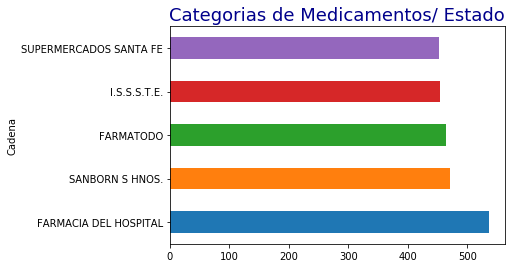

In [265]:
Chainpriceplot = chain_price.plot.barh()
Chainpriceplot.set_title('Categorias de Medicamentos/ Estado', fontsize = 18, color= 'DarkBlue')

## Gráfica 9
### Precio promedio de medicamentos 2015 por top 5 cadenas (max precio)

Gráfica que ponga el top 5 de las cadenas con mayor precio en Mexico

In [18]:
top5_chainprice = pd.DataFrame([chain_price])
#top5_chainprice.columns = top5_chain.columns.droplevel(-1)
#Data Frame con el Top 5 de estados con mayores registros de medicamentos
top5_chainprice.transpose()

,Precio
Cadena,
FARMACIA DEL HOSPITAL,536.142281
SANBORN S HNOS.,471.622358
FARMATODO,464.985363
I.S.S.S.T.E.,454.451348
SUPERMERCADOS SANTA FE,453.014864


## Gráfica 10
### % prima o descuento de precio promedio en medicamentos por el top 5 de Cadenas con mayor precio

Esta es una métrica que saqué aparte y creo que si es posible podríamos fusionar la primera con la gráfica9 y podemos hacer una gráfica combinada de barras y línea para que salgan ambas métricas. pero l oque sea más fácil

In [19]:
top5_chainpriceperc = top5_chainprice / avg_medprice - 1
top5_chainpriceperc.transpose().style.format("{:.2%}")

,Precio
Cadena,
FARMACIA DEL HOSPITAL,41.23%
SANBORN S HNOS.,24.24%
FARMATODO,22.49%
I.S.S.S.T.E.,19.71%
SUPERMERCADOS SANTA FE,19.33%


In [225]:
top5_chainpriceperc.plot.violinplot()

AttributeError: 'FramePlotMethods' object has no attribute 'violinplot'

In [211]:
y= "chain_price" in chain_price.plot
top5_chainpriceperc.plot.scatter()


TypeError: argument of type 'SeriesPlotMethods' is not iterable

# A huevo, nos la pela esto